<!-- Current implementation does:
1. BallTree construction (fit)
2. searching for one closest neighbor (query)
3. final tree visualization (non-interractive)

Further improvements:
1. introduce leaf size (currently it's one)?
2. allow to pass to query several points at a time (X instead of x)?
3. implement query radius method?
4. implement tree descriptive statistics (depth, num nodes, ratio of visited nodes, etc.)
5. optimize code (e.g. omit coppying data)
6. create interractive visualization
7. prettify & document code ;) -->

### This notebook presents visualisation of KD-Tree and Ball-Tree construction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.kdtree import KDTreeOptimizer
from src.balltree import BallTreeOptimizer

In [2]:
np.random.seed(42)

We define our dataset to test KNN on.  
The dataset will be in two dimensions that replicate sine wave with noise.  
We also define paramenters to use in our optimizers:
* Numbe of train points - 100;
* Number of query points - 1;
* Dimensionality - 2;
* number of neighbors - 3;
* leaf size - 7.

In [3]:
n = 100
nq = 1
d = 2
k = 3
l = 7

space = np.linspace(0, 2*np.pi, n)[:,np.newaxis]
# for training
X = np.hstack([space, np.sin(space)]) + 0.1 * np.random.randn(n)[:,np.newaxis]
# for query
Xq = X[np.random.randint(0, len(X), nq)] + np.random.randn(nq, d)

Here is how train data (red) and query (green) data look like:

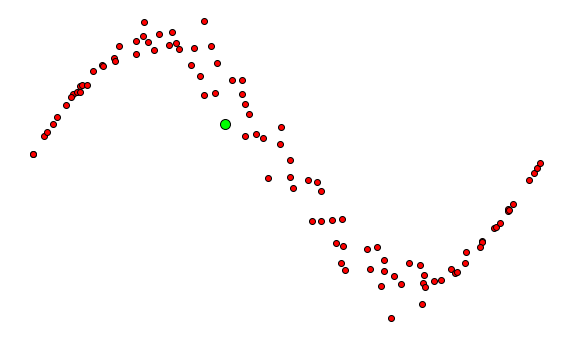

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,0], X[:,1], color='red', edgecolor='black')
ax.scatter(Xq[:,0], Xq[:,1], color='lime', s=100, edgecolor='black')
ax.axis('off');

Our optimizers return indices of data points corresponding to nearest neighbors.  
Below here is a helper function to convert that indices to data points.

In [5]:
def idx2points(X: np.ndarray, idx: np.ndarray) -> np.ndarray:
    """convert 2D indices to 3D points"""
    return np.apply_along_axis(lambda x: X[x], axis=-1, arr=idx)

# Ball-Tree 

Create Ball-Tree optimizer with training data and perform query:

In [6]:
bt = BallTreeOptimizer(X, leaf_size=l)
idx = bt.query(Xq, k=k)

# prediction indices
idx  # nq, k

array([[42, 44, 38]])

We got indices, but need to convert them into data points:

In [7]:
# points prediction shape
points = idx2points(X, idx)
points.shape # nq, k, d

(1, 3, 2)

Show construction process:
* gray circles - tree balls
* red points - data points
* green star point - target query point
* red star points - nearest neighbors of target point

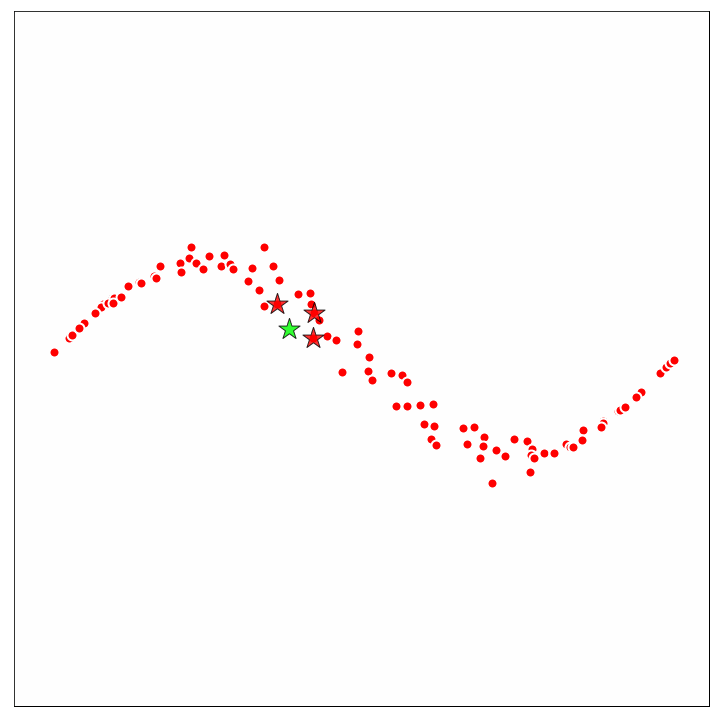

In [8]:
for x, y in zip(Xq, points):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter([x[0]], [x[1]], marker='*', s=500, color='lime', zorder=1000, edgecolor='black', alpha=0.8)
    ax.scatter(y[:,0], y[:,1], marker='*', s=500, color='red', zorder=1001, edgecolor='black', alpha=0.8)
    bt.plot(animate=True, fig_ax=(fig, ax))

# KD-Tree 

Create KD-Tree optimizer with training data and perform query:

In [9]:
kd = KDTreeOptimizer(X, leaf_size=l)
idx = kd.query(Xq, k=k)

# prediction indices
idx  # nq, k

array([[42, 44, 38]], dtype=uint32)

We got indices, but need to convert them into data points:

In [10]:
# points prediction shape
points = idx2points(X, idx)
points.shape # nq, k, d

(1, 3, 2)

Show construction process:
* red and blue lines - horisontal and vertical splits
* black points - data points
* green star point - target query point
* red star points - nearest neighbors of target point

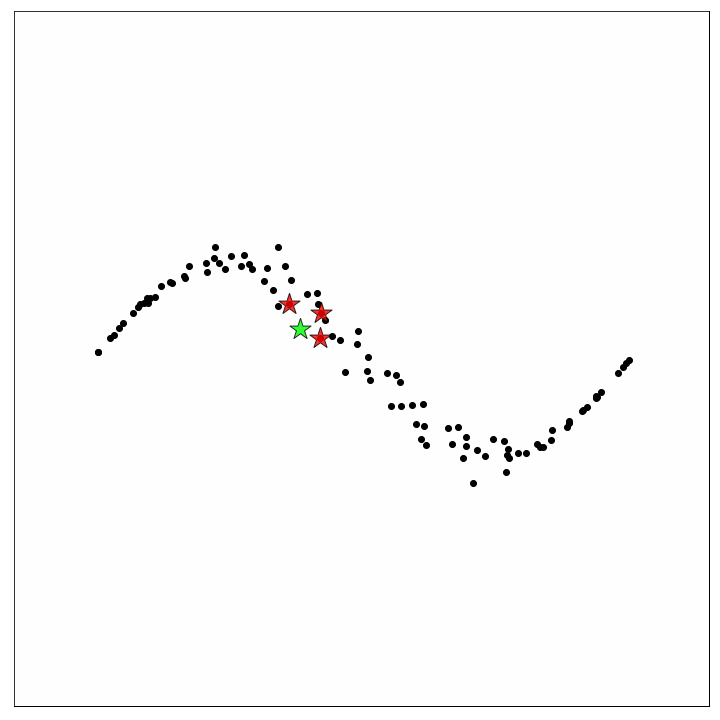

In [11]:
for x, y in zip(Xq, points):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter([x[0]], [x[1]], marker='*', s=500, color='lime', zorder=1000, edgecolor='black', alpha=0.8)
    ax.scatter(y[:,0], y[:,1], marker='*', s=500, color='red', zorder=1001, edgecolor='black', alpha=0.8)
    kd.plot(animate=True, fig_ax=(fig, ax))